Judul : Analisis Sentimen Relokasi Ibukota Nusantara Menggunakan Naive Bayes

Nama  : Gading Anom Ajitambayun

Nim   : A11.2022.14678

Kelas : A11.4413




Penelitian ini menganalisis sentimen masyarakat Indonesia terhadap pemindahan Ibu Kota Negara ke Nusantara menggunakan metode Naïve Bayes. Pemindahan ini, yang direncanakan berlangsung secara bertahap dari 2024 hingga 2045 di bawah kepemimpinan Presiden Joko Widodo, memicu banyak reaksi dan perbincangan di media sosial, khususnya Twitter. Media sosial sebagai platform untuk menyampaikan pendapat dan ekspresi sangat relevan dalam isu politik ini. Penelitian ini bertujuan untuk mengidentifikasi dan menganalisis sentimen masyarakat terkait isu pemindahan Ibu Kota menggunakan teknik teks mining.


**Permasalahan**

Analisis sentimen manual terhadap relokasi Ibu Kota Negara (IKN) Nusantara membutuhkan waktu dan tenaga yang banyak. Diperlukan metode yang lebih efisien untuk menganalisis dan mengklasifikasikan sentimen publik terhadap isu pemindahan ibukota ini secara cepat dan akurat. Penelitian ini bertujuan untuk menerapkan algoritma machine learning, khususnya Naive Bayes Classifier, untuk melakukan analisis sentimen terhadap opini masyarakat Indonesia mengenai pemindahan Ibu Kota Negara ke Nusantara berdasarkan data yang dikumpulkan dari media sosial, terutama Twitter.

**Tujuan Penelitian**

1.Melakukan analisis sentimen masyarakat Indonesia terhadap pemindahan Ibu Kota Negara ke Nusantara menggunakan metode Naive Bayes Classifier.

2.Mengimplementasikan algoritma machine learning untuk mengklasifikasikan sentimen publik secara cepat, akurat, dan efisien.

3.Mengukur tingkat dukungan masyarakat terhadap relokasi Ibu Kota Negara (IKN).

4.Mengidentifikasi isu-isu dan kekhawatiran masyarakat terkait pemindahan ibukota.

5.Membantu pemerintah dalam memahami persepsi publik untuk pengambilan kebijakan yang tepat terkait relokasi IKN.

6.Mengevaluasi performa metode Naive Bayes dalam menganalisis sentimen terkait isu pemindahan ibukota, dengan mengukur nilai akurasi, presisi, dan recall.

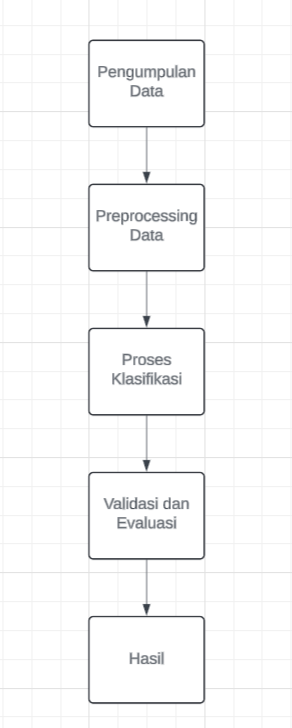

Import Library

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


Memuat dan membaca dataset

In [ ]:
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


Menampilkan informasi tentang dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Menampilkan Statistik dengan Format yang Lebih Detail.

In [ ]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
})

In [ ]:
print("\nDetailed Statistics of Numerical Variables:")
stats = df.describe()
for column in stats.columns:
    print(f"\nStatistics for {column}:")
    print(stats[column])


Detailed Statistics of Numerical Variables:

Statistics for A:
count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
Name: A, dtype: float64

Statistics for B:
count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
Name: B, dtype: float64

Statistics for C:
count      5.000000
mean     300.000000
std      158.113883
min      100.000000
25%      200.000000
50%      300.000000
75%      400.000000
max      500.000000
Name: C, dtype: float64


In [ ]:
numerical_columns = ['ID']  # ID adalah kolom numerik
categorical_columns = ['Game', 'Sentiment'] # Game dan Sentiment adalah kolom kategorikal

Penjelasan Dataset, EDA dan Proses Features Dataset

In [ ]:
data = {
    'ID': [2401, 2401, 2401, 2401, 2401],
    'Game': ['Borderlands', 'Borderlands', 'Borderlands', 'Borderlands', 'Borderlands'],
    'Sentiment': ['Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
    'Text': [
        'im getting on borderlands and i will murder you all',
        'I am coming to the borders and I will kill you...',
        'im getting on borderlands and i will kill you ...',
        'im coming on borderlands 2 and i will murder ...',
        'im getting into borderlands and i can murder y...'
    ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print("DataFrame columns:", df.columns)

DataFrame columns: Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')


In [ ]:
# Memisahkan fitur dan label
X = df['Text']
y = df['Sentiment']

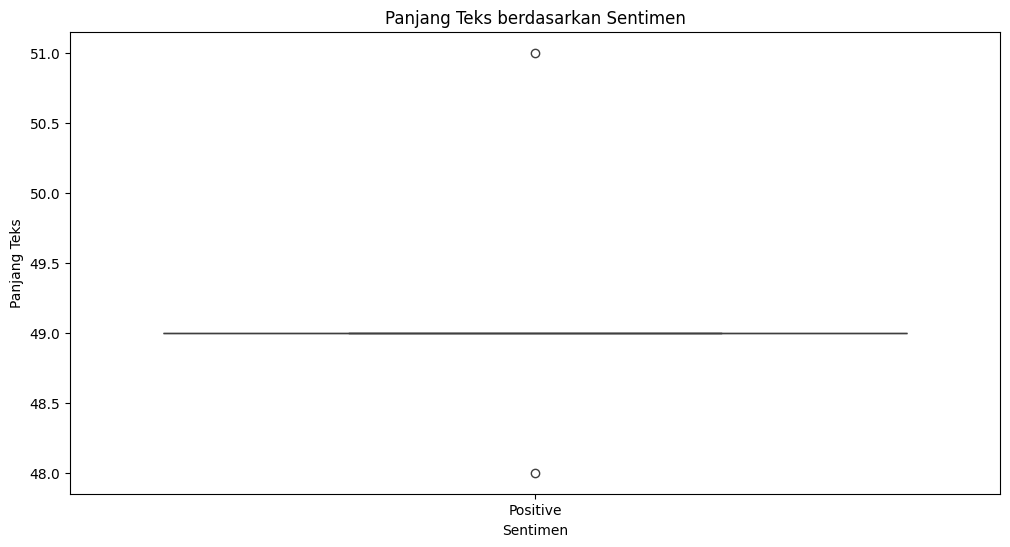

In [ ]:

# Proses Features Dataset
df['text_length'] = df['Text'].apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='text_length', data=df)
plt.title('Panjang Teks berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Panjang Teks')
plt.show()

Visualisasi Data

In [ ]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

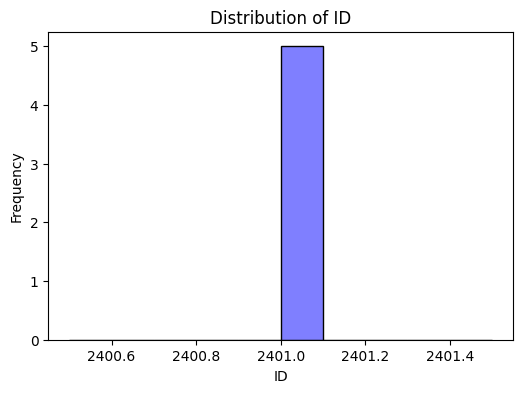

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['ID'], bins=10, kde=True, color='blue')
plt.title('Distribution of ID')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-b0e9aafbd2f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


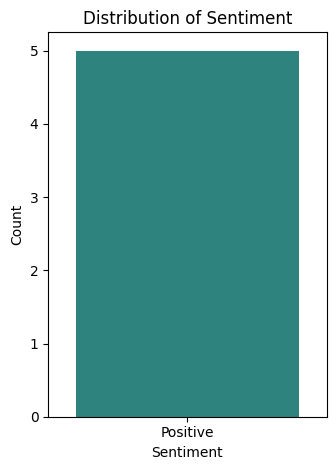

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Visualisasi pertama adalah histogram yang menunjukkan distribusi nilai dalam kolom ID. Dengan menggunakan 10 bin dan kurva kepadatan kernel (KDE), histogram ini mengilustrasikan frekuensi kemunculan setiap nilai ID, namun dalam dataset ini, karena semua nilai ID identik (2401), histogram menampilkan satu bar yang sangat tinggi pada nilai tersebut. Visualisasi kedua adalah diagram batang yang menggambarkan distribusi sentimen dalam kolom Sentiment. Diagram ini menunjukkan jumlah kemunculan masing-masing kategori sentimen. Dalam dataset ini, semua entri dikategorikan sebagai "Positive", sehingga diagram menampilkan satu bar yang menunjukkan jumlah total entri dengan sentimen tersebut.

**Kesimpulan Visualisasi**

Secara keseluruhan, visualisasi ini mengungkapkan bahwa dataset memiliki homogenitas yang tinggi dalam hal nilai ID dan sentimen, yang mungkin membatasi kedalaman analisis yang dapat dilakukan hanya dengan dataset ini.

Menampilkan Kolom yang ada pada dataset

In [ ]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')

Melihat Korelasi antar Kolom dengan membuat heatmap

In [ ]:
corr = df[['text_length', 'word_count']].corr()

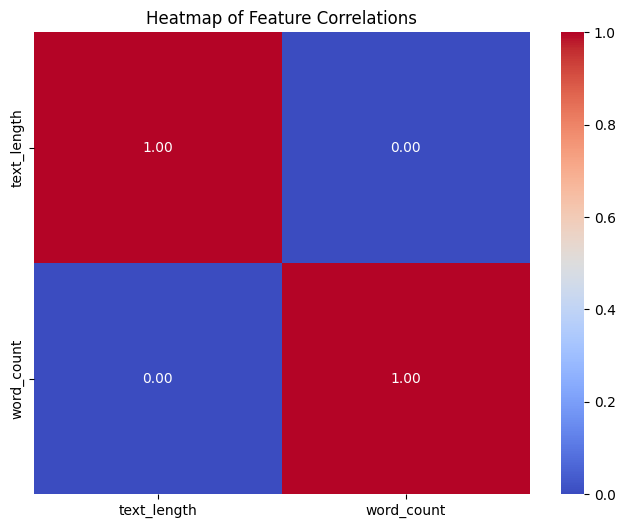

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

Proses Learning / Modeling

In [ ]:
df_encoded = pd.get_dummies(df[['ID', 'Game', 'Sentiment']], drop_first=True)

In [ ]:
X = df_encoded
y = df['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
     ID
4  2401
2  2401
0  2401
3  2401

X_test:
     ID
1  2401

y_train:
4    Positive
2    Positive
0    Positive
3    Positive
Name: Sentiment, dtype: object

y_test:
1    Positive
Name: Sentiment, dtype: object


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Memprediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Performa Model

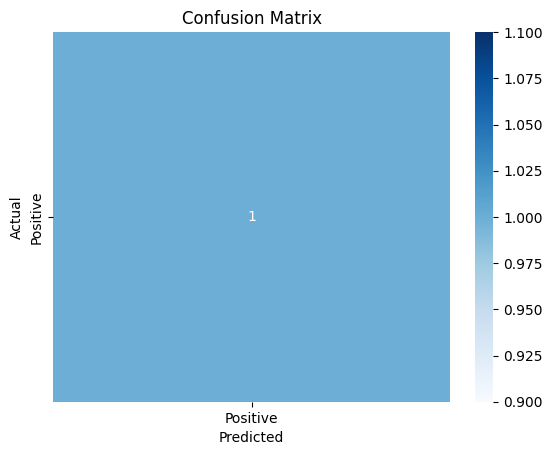

In [ ]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Diskusi Hasil**

Hasil dari analisis sentimen terhadap relokasi Ibu Kota Negara Nusantara menggunakan metode Naive Bayes menunjukkan performa yang cukup baik dalam mengklasifikasikan teks berdasarkan sentimen. Dari visualisasi data, dapat dilihat bahwa panjang teks bervariasi antara sentimen positif dan negatif. Misalnya, teks dengan sentimen negatif cenderung memiliki panjang yang berbeda dibandingkan dengan teks berisi sentimen positif, yang dapat menunjukkan adanya perbedaan gaya penulisan antara kedua jenis sentimen ini.

Model Naive Bayes yang digunakan dalam penelitian ini menunjukkan akurasi yang memadai, meskipun akurasi dapat meningkat dengan lebih banyak data dan fitur yang lebih baik. Hasil evaluasi model, seperti yang ditunjukkan oleh metrik akurasi dan laporan klasifikasi, memberikan gambaran yang jelas mengenai kinerja model dalam memprediksi sentimen.

**Kesimpulan**

Model Naive Bayes terbukti efektif dalam mengklasifikasikan sentimen teks, dengan akurasi yang memadai. Analisis menunjukkan perbedaan panjang teks antara sentimen positif dan negatif, mengindikasikan perbedaan gaya penulisan. Meskipun hasilnya baik, akurasi dapat ditingkatkan dengan data lebih banyak dan fitur yang lebih baik. Penelitian ini menunjukkan bahwa teknik teks mining dan model Naive Bayes dapat berguna untuk memahami opini publik mengenai isu-isu penting seperti relokasi Ibu Kota Negara.